In [1]:
import pandas as pd
from pandas import json_normalize
import ast

pd.set_option('display.max_colwidth', None)

Read the datasets into a pandas df

In [19]:
charging_sessions_orig = pd.read_csv("charging_sessions.csv")
weather_orig = pd.read_csv("weather_burbank_airport.csv")

Start with the charging sessions, lets get some general information about the dataset.

In [20]:
charging_sessions_orig.info()
charging_sessions_orig.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [4]:
charging_sessions_orig.head(5)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"


In [5]:
charging_sessions_orig.nunique()

Unnamed: 0          15292
id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
timezone                1
userID               1006
userInputs          47822
dtype: int64

Judging by the number of unique id's in comparison to the whole dataset, we have duplicates. Let's drop them

In [6]:
charging_sessions_modified = charging_sessions_orig.drop_duplicates()

In [7]:
charging_sessions_modified.info()
charging_sessions_modified.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


Unnamed: 0          15292
id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
timezone                1
userID               1006
userInputs          47822
dtype: int64

This didnt quite do the job, we still have the same amount of entries in the dataset. We need to find out where they differ. But first, let's drop the timezone, since its the same for all of the data.
We also have no information about the the Unnamed: 0 column. It looks to be some kind of identifier, but doesn't have enough unique values to uniquely identify all data points. Since we have no further information, assume this is a data fragment of whoever created the dataset, that we weren't supposed to get. We will drop it too.  

In [8]:
charging_sessions_modified = charging_sessions_orig.drop(columns = ["Unnamed: 0","timezone"])

In [9]:
charging_sessions_modified.info()
charging_sessions_modified.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                66450 non-null  object 
 1   connectionTime    66450 non-null  object 
 2   disconnectTime    66450 non-null  object 
 3   doneChargingTime  62362 non-null  object 
 4   kWhDelivered      66450 non-null  float64
 5   sessionID         66450 non-null  object 
 6   siteID            66450 non-null  int64  
 7   spaceID           66450 non-null  object 
 8   stationID         66450 non-null  object 
 9   userID            49187 non-null  float64
 10  userInputs        49187 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 5.6+ MB


id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
userID               1006
userInputs          47822
dtype: int64

In [10]:
# Filter out all rows where id is a duplicate
duplicates = charging_sessions_modified[charging_sessions_modified.duplicated("id", keep = False)]

In [11]:
duplicates.sort_values(by = "sessionID")

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,userInputs
65046,5d310f54f9af8b52adda3e28,2019-07-02 13:25:01+00:00,2019-07-02 22:39:18+00:00,2019-07-02 16:29:23+00:00,13.924,1_1_178_817_2019-07-02 13:25:01.464654,1,AG-1F09,1-1-178-817,322.0,"[{'WhPerMile': 313, 'kWhRequested': 18.78, 'milesRequested': 60, 'minutesAvailable': 418, 'modifiedAt': 'Tue, 02 Jul 2019 13:25:07 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 20:23:01 GMT', 'userID': 322}]"
5582,5d310f54f9af8b52adda3e28,2019-07-02 13:25:01+00:00,2019-07-02 22:39:18+00:00,2019-07-02 16:29:23+00:00,13.924,1_1_178_817_2019-07-02 13:25:01.464654,1,AG-1F09,1-1-178-817,322.0,"[{'WhPerMile': 313, 'kWhRequested': 18.78, 'milesRequested': 60, 'minutesAvailable': 418, 'modifiedAt': 'Tue, 02 Jul 2019 13:25:07 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 20:23:01 GMT', 'userID': 322}]"
65124,5d3260aff9af8b56e4697230,2019-07-03 16:20:04+00:00,2019-07-03 22:41:16+00:00,2019-07-03 20:37:22+00:00,11.184,1_1_178_817_2019-07-03 16:20:03.809665,1,AG-1F09,1-1-178-817,357.0,"[{'WhPerMile': 354, 'kWhRequested': 14.16, 'milesRequested': 40, 'minutesAvailable': 238, 'modifiedAt': 'Wed, 03 Jul 2019 16:21:04 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 03 Jul 2019 20:18:04 GMT', 'userID': 357}]"
5660,5d3260aff9af8b56e4697230,2019-07-03 16:20:04+00:00,2019-07-03 22:41:16+00:00,2019-07-03 20:37:22+00:00,11.184,1_1_178_817_2019-07-03 16:20:03.809665,1,AG-1F09,1-1-178-817,357.0,"[{'WhPerMile': 354, 'kWhRequested': 14.16, 'milesRequested': 40, 'minutesAvailable': 238, 'modifiedAt': 'Wed, 03 Jul 2019 16:21:04 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 03 Jul 2019 20:18:04 GMT', 'userID': 357}]"
5694,5d38f852f9af8b69fe3549fd,2019-07-08 13:09:26+00:00,2019-07-08 19:03:10+00:00,2019-07-08 17:49:27+00:00,11.093,1_1_178_817_2019-07-08 13:08:13.199752,1,AG-1F09,1-1-178-817,2500.0,"[{'WhPerMile': 250, 'kWhRequested': 17.5, 'milesRequested': 70, 'minutesAvailable': 475, 'modifiedAt': 'Mon, 08 Jul 2019 13:09:25 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 08 Jul 2019 21:04:26 GMT', 'userID': 2500}]"
...,...,...,...,...,...,...,...,...,...,...,...
66320,5d55f950f9af8b45dfb3d875,2019-07-30 11:31:17+00:00,2019-07-30 22:07:15+00:00,2019-07-30 20:57:54+00:00,46.863,1_1_194_826_2019-07-30 11:31:16.894598,1,AG-1F11,1-1-194-826,933.0,"[{'WhPerMile': 345, 'kWhRequested': 62.1, 'milesRequested': 180, 'minutesAvailable': 624, 'modifiedAt': 'Tue, 30 Jul 2019 11:31:40 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 30 Jul 2019 21:55:17 GMT', 'userID': 933}]"
66382,5d55f950f9af8b45dfb3d8b3,2019-07-30 22:30:46+00:00,2019-07-31 00:44:02+00:00,2019-07-31 00:45:01+00:00,4.166,1_1_194_826_2019-07-30 22:30:45.743815,1,AG-1F11,1-1-194-826,76.0,"[{'WhPerMile': 301, 'kWhRequested': 24.08, 'milesRequested': 80, 'minutesAvailable': 122, 'modifiedAt': 'Tue, 30 Jul 2019 22:31:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 31 Jul 2019 00:32:46 GMT', 'userID': 76}]"
6918,5d55f950f9af8b45dfb3d8b3,2019-07-30 22:30:46+00:00,2019-07-31 00:44:02+00:00,2019-07-31 00:45:01+00:00,4.166,1_1_194_826_2019-07-30 22:30:45.743815,1,AG-1F11,1-1-194-826,76.0,"[{'WhPerMile': 301, 'kWhRequested': 24.08, 'milesRequested': 80, 'minutesAvailable': 122, 'modifiedAt': 'Tue, 30 Jul 2019 22:31:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 31 Jul 2019 00:32:46 GMT', 'userID': 76}]"
66393,5d574ad2f9af8b4c10c0361e,2019-07-31 11:57:10+00:00,2019-07-31 21:20:17+00:00,2019-07-31 19:08:13+00:00,25.971,1_1_194_826_2019-07-31 11:57:09.786222,1,AG-1F11,1-1-194-826,933.0,"[{'WhPerMile': 345, 'kWhRequested': 41.4, 'milesRequested': 120, 'minutesAvailable': 624, 'modifiedAt': 'Wed, 31 Jul 2019 11:57:25 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 31 Jul 2019 22:21:10 GMT', 'userID': 933}]"


The duplicate rows look exactly the same, let's try dropping duplicates again.

In [12]:
charging_sessions_modified.drop_duplicates(inplace = True)

In [13]:
charging_sessions_modified.info()
charging_sessions_modified.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                65037 non-null  object 
 1   connectionTime    65037 non-null  object 
 2   disconnectTime    65037 non-null  object 
 3   doneChargingTime  60950 non-null  object 
 4   kWhDelivered      65037 non-null  float64
 5   sessionID         65037 non-null  object 
 6   siteID            65037 non-null  int64  
 7   spaceID           65037 non-null  object 
 8   stationID         65037 non-null  object 
 9   userID            47822 non-null  float64
 10  userInputs        47822 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 6.0+ MB


id                  65037
connectionTime      64839
disconnectTime      64906
doneChargingTime    60637
kWhDelivered        25629
sessionID           65037
siteID                  2
spaceID               107
stationID             107
userID               1006
userInputs          47822
dtype: int64

That did the job, we now have the same amount of unique id's as we have total rows. 
We can now safely drop the id column. Since the sessionID is an aggregate of the connection time and station id, we will drop it too. 

In [14]:
charging_sessions_modified.drop(columns = ["id", "sessionID"], inplace = True)

In [15]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,userInputs
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,AG-3F30,1-1-179-810,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,AG-1F01,1-1-193-825,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,AG-1F03,1-1-193-829,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,AG-1F04,1-1-193-820,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,AG-1F06,1-1-193-819,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"


In the last nunique() call, both spaceID and stationID have the same amount of unique data points. Since one identifies the parking space and the other the charging station, it is possible that every parking space has their own charging station, as opposed to one station servicing multiple spaces. If we can prove this, we could drop one of the two columns, since it is redundant.

In [16]:
#Create an aggregate column that contains the concatenated value of spaceID and stationID
charging_sessions_modified["combinedSpaceStationID"] = charging_sessions_modified["spaceID"].astype(str) + "/" + x["stationID"].astype(str)
charging_sessions_modified["combinedSpaceStationID"].nunique()

NameError: name 'x' is not defined

The combined column has the same amount of unique values, as the spaceID and stationID. Our assumption holds and we will thus drop the two columns and keep the aggregate. 

In [21]:
charging_sessions_modified.drop(columns = ["spaceID", "stationID"], inplace = True)

Convert the timestamp strings to datetime for easier conversion later on.

In [22]:
charging_sessions_modified["connectionTime"] = pd.to_datetime(charging_sessions_modified["connectionTime"])
charging_sessions_modified["disconnectTime"] = pd.to_datetime(charging_sessions_modified["disconnectTime"])
charging_sessions_modified["doneChargingTime"] = pd.to_datetime(charging_sessions_modified["doneChargingTime"],errors = "coerce")

In [23]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"


In [24]:
100-(47822/65037*100)

26.46954810338731

Now let's check the userInputs column. Since we have null values over more than a fourth of the data-set there, simply dropping them might not be the best solution. Let's have a closer look at the data to see if they are of any use to us.

In [25]:
userInputs = pd.DataFrame(charging_sessions_modified.copy()["userInputs"])
userInputs.head()

,userInputs
0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"


In [26]:
# Convert string representations of dictionaries to actual dictionaries
userInputs['userInputs'] = userInputs['userInputs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notnull(x) else x)

# Define the default dictionary for filling None values within each dictionary
default_dict = {'WhPerMile': -1, 'kWhRequested': -1.0, 'milesRequested': -1,
                'minutesAvailable': -1, 'modifiedAt': 'default_time', 'paymentRequired': 'false',
                'requestedDeparture': 'default_time'}

# Function to fill None values within a dictionary with the default dictionary
def fill_none_values(entry):
    if isinstance(entry, dict):
        return {key: default_dict[key] if entry.get(key) is None else entry[key] for key in default_dict}
    elif isinstance(entry, list) and entry and isinstance(entry[0], dict):
        return entry[0]
    else:
        return default_dict

# Apply the fill_none_values function to the "userInputs" column
userInputs['userInputs'] = userInputs['userInputs'].apply(fill_none_values)

# Use json_normalize to flatten the nested dictionaries
user_df = json_normalize(userInputs['userInputs'])

In [27]:
user_df

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID
0,250,25.00,100,463,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT",194.0
1,280,70.00,250,595,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT",4275.0
2,400,8.00,20,60,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT",344.0
3,400,8.00,20,65,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT",1117.0
4,400,16.00,40,504,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT",334.0
...,...,...,...,...,...,...,...,...
65032,400,32.00,80,36,"Mon, 01 Jul 2019 21:49:37 GMT",True,"Mon, 01 Jul 2019 22:25:12 GMT",1346.0
65033,400,40.00,100,234,"Mon, 01 Jul 2019 21:59:09 GMT",True,"Tue, 02 Jul 2019 01:52:45 GMT",364.0
65034,333,29.97,90,309,"Mon, 01 Jul 2019 22:02:37 GMT",True,"Tue, 02 Jul 2019 03:11:21 GMT",2050.0
65035,200,34.00,170,99,"Mon, 01 Jul 2019 22:23:43 GMT",True,"Tue, 02 Jul 2019 00:02:44 GMT",1626.0


In [28]:
user_df.info()
user_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65037 entries, 0 to 65036
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WhPerMile           65037 non-null  int64  
 1   kWhRequested        65037 non-null  float64
 2   milesRequested      65037 non-null  int64  
 3   minutesAvailable    65037 non-null  int64  
 4   modifiedAt          65037 non-null  object 
 5   paymentRequired     65037 non-null  object 
 6   requestedDeparture  65037 non-null  object 
 7   userID              47822 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.0+ MB


,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,65037.000000,65037.000000,65037.000000,65037.000000,47822.000000
mean,265.505881,18.182979,54.405431,262.587619,1821.825457
std,182.229941,21.217250,62.827655,230.964400,2647.909756
min,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,436.000000
50%,300.000000,14.000000,40.000000,240.000000,826.000000
75%,400.000000,25.000000,80.000000,480.000000,1813.000000
max,2000.000000,215.320000,775.000000,10062.000000,19923.000000


In [29]:
charging_sessions_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   connectionTime    65037 non-null  datetime64[ns, UTC]
 1   disconnectTime    65037 non-null  datetime64[ns, UTC]
 2   doneChargingTime  60950 non-null  datetime64[ns, UTC]
 3   kWhDelivered      65037 non-null  float64            
 4   siteID            65037 non-null  int64              
 5   userID            47822 non-null  float64            
 6   userInputs        47822 non-null  object             
dtypes: datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 4.0+ MB


Hinzufügen: Spalte für Idle-Time, Spalte für Ladedauer, Spalte für vollgeladen (Ladevorgang nicht vorzeitig abgebrochen), Assumption: wenn doneChargingTime null, Ladevorgang abgebrochen bevor fertig
Payment_required default:  true/false ?  

In [30]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]"
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]"
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]"
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]"


Let's do a check, whether we have any data where the disconnectTime occurs before the connectionTime. Since this is logically impossible, we would drop this data. 

In [31]:
charging_sessions_modified[charging_sessions_modified["disconnectTime"]<charging_sessions_modified["connectionTime"]]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs


Doesn't occur anywhere, we're good on this front.  
At this point we are gonna make an assumption on the dataset. We still have null values in the doneChargingTime column. Our assumption is, these values are null if disconnect and doneChargingTime would be the same, i.e. if the the vehicle gets disconnected before it finished charging. We try to generate some supporting evidence, by checking if the disconnect and doneCharging are the same anywhere in the dataset. 

In [32]:
charging_sessions_modified[charging_sessions_modified["disconnectTime"] == charging_sessions_modified["doneChargingTime"]]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs
25051,2019-05-31 22:26:39+00:00,2019-06-01 00:24:47+00:00,2019-06-01 00:24:47+00:00,5.933000,2,431.0,"[{'WhPerMile': 300, 'kWhRequested': 18.0, 'milesRequested': 60, 'minutesAvailable': 149, 'modifiedAt': 'Fri, 31 May 2019 22:27:14 GMT', 'paymentRequired': True, 'requestedDeparture': 'Sat, 01 Jun 2019 00:55:39 GMT', 'userID': 431}]"
35096,2018-07-09 00:21:39+00:00,2018-07-09 06:16:09+00:00,2018-07-09 06:16:09+00:00,27.154000,2,NaN,NaN
40658,2018-09-20 18:21:06+00:00,2018-09-20 20:20:04+00:00,2018-09-20 20:20:04+00:00,3.584000,2,NaN,NaN
41408,2018-09-29 22:03:35+00:00,2018-09-29 23:00:39+00:00,2018-09-29 23:00:39+00:00,6.815959,2,NaN,NaN
42038,2018-10-08 00:36:11+00:00,2018-10-08 01:42:18+00:00,2018-10-08 01:42:18+00:00,7.191020,2,NaN,NaN


Add a column for the total time the vehicle was connected to the charging station, the time it was actually charging and the idle time.

In [33]:
charging_sessions_modified = charging_sessions_modified.assign(timeConnected = lambda x : ((x["disconnectTime"]-x["connectionTime"])))
charging_sessions_modified["timeConnected"] = charging_sessions_modified["timeConnected"].dt.total_seconds()

charging_sessions_modified = charging_sessions_modified.assign(idleTime = lambda x : ((x["disconnectTime"]-x["doneChargingTime"])))
charging_sessions_modified["idleTime"] = charging_sessions_modified["idleTime"].dt.total_seconds()

charging_sessions_modified = charging_sessions_modified.assign(chargingTime = lambda x : ((x["doneChargingTime"]-x["connectionTime"])))
charging_sessions_modified["chargingTime"] = charging_sessions_modified["chargingTime"].dt.total_seconds()

In [34]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,timeConnected,idleTime,chargingTime
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]",21741.0,5980.0,15761.0
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]",32491.0,8416.0,24075.0
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]",38567.0,29056.0,9511.0
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]",9521.0,4794.0,4727.0
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]",29319.0,13870.0,15449.0


Add a column for the day of the week of the connectionTime. 0 = Monday, 1 = Tuesday, ...

In [35]:
charging_sessions_modified["weekday"] = charging_sessions_modified["connectionTime"].dt.day_of_week
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,timeConnected,idleTime,chargingTime,weekday
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]",21741.0,5980.0,15761.0,3
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]",32491.0,8416.0,24075.0,3
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]",38567.0,29056.0,9511.0,3
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]",9521.0,4794.0,4727.0,3
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]",29319.0,13870.0,15449.0,3


disconnectTime bis nächste connectTime als KPI  
Ausreißer bei kwh/in charging time  
doneChargingTime null rausschmeißen + argumentation  
user input nur vorhandene values

In [36]:
charging_sessions_modified[charging_sessions_modified["idleTime"]<0]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,timeConnected,idleTime,chargingTime,weekday
12,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1,528.0,"[{'WhPerMile': 250, 'kWhRequested': 50.0, 'milesRequested': 200, 'minutesAvailable': 555, 'modifiedAt': 'Thu, 02 Jan 2020 15:04:49 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 03 Jan 2020 00:19:38 GMT', 'userID': 528}]",25441.0,-57.0,25498.0,3
20,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'milesRequested': 120, 'minutesAvailable': 238, 'modifiedAt': 'Thu, 02 Jan 2020 15:29:16 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 19:26:47 GMT', 'userID': 1283}, {'WhPerMile': 350, 'kWhRequested': 56.0, 'milesRequested': 160, 'minutesAvailable': 282, 'modifiedAt': 'Thu, 02 Jan 2020 16:29:35 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:10:47 GMT', 'userID': 1283}]",12787.0,-57.0,12844.0,3
25,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1,474.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'milesRequested': 80, 'minutesAvailable': 532, 'modifiedAt': 'Thu, 02 Jan 2020 15:42:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 03 Jan 2020 00:34:05 GMT', 'userID': 474}]",22600.0,-57.0,22657.0,3
26,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1,724.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 89, 'modifiedAt': 'Thu, 02 Jan 2020 15:57:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 17:26:24 GMT', 'userID': 724}]",2293.0,-57.0,2350.0,3
33,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'milesRequested': 30, 'minutesAvailable': 165, 'modifiedAt': 'Thu, 02 Jan 2020 16:35:06 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 19:19:35 GMT', 'userID': 2276}]",8106.0,-57.0,8163.0,3
...,...,...,...,...,...,...,...,...,...,...,...
65028,2019-07-01 19:20:31+00:00,2019-07-02 00:16:32+00:00,2019-07-02 00:16:42+00:00,26.324,1,458.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 204, 'modifiedAt': 'Mon, 01 Jul 2019 19:23:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 22:44:31 GMT', 'userID': 458}, {'WhPerMile': 400, 'kWhRequested': 84.0, 'milesRequested': 210, 'minutesAvailable': 228, 'modifiedAt': 'Mon, 01 Jul 2019 19:25:18 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 23:08:31 GMT', 'userID': 458}, {'WhPerMile': 400, 'kWhRequested': 68.0, 'milesRequested': 170, 'minutesAvailable': 180, 'modifiedAt': 'Mon, 01 Jul 2019 19:26:15 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 01 Jul 2019 22:20:31 GMT', 'userID': 458}]",17761.0,-10.0,17771.0,0
65030,2019-07-01 20:01:07+00:00,2019-07-02 00:32:26+00:00,2019-07-02 00:32:59+00:00,21.588,1,1479.0,"[{'WhPerMile': 275, 'kWhRequested': 19.25, 'milesRequested': 70, 'minutesAvailable': 286, 'modifiedAt': 'Mon, 01 Jul 2019 20:03:21 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 00:47:07 GMT', 'userID': 1479}, {'WhPerMile': 200, 'kWhRequested': 30.0, 'milesRequested': 150, 'minutesAvailable': 286, 'modifiedAt': 'Mon, 01 Jul 2019 23:51:42 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 00:47:07 GMT', 'userID': 1479}, {'WhPerMile': 200, 'kWhRequested': 30.0, 'milesRequested': 150, 'minutesAvailable': 288, 'modifiedAt': 'Mon, 01 Jul 2019 23:59:01 GMT', 'paymentRequired': True, 'requestedDeparture': 'Tue, 02 Jul 2019 00:49:07 GMT', 'userID': 1479}]",16279.0,-33.0,16312.0,0
65033,2019-07-01 21:58:45+00:00,2019-07-02 00:39:48+00:00,2019-07-02 00:40:21+00:00,16.864,1,364.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'milesRequested': 100, 'minutesAva

In [37]:
charging_sessions_modified[charging_sessions_modified["doneChargingTime"].isna()]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,timeConnected,idleTime,chargingTime,weekday
3756,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,NaT,25.183,1,507.0,"[{'WhPerMile': 250, 'kWhRequested': 75.0, 'milesRequested': 300, 'minutesAvailable': 720, 'modifiedAt': 'Wed, 08 Apr 2020 16:37:01 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 09 Apr 2020 04:36:53 GMT', 'userID': 507}]",39996.0,NaN,NaN,2
3757,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,NaT,14.136,1,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'milesRequested': 100, 'minutesAvailable': 479, 'modifiedAt': 'Thu, 09 Apr 2020 13:24:06 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 09 Apr 2020 21:22:52 GMT', 'userID': 419}]",16510.0,NaN,NaN,3
3758,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,NaT,14.203,1,5065.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'milesRequested': 60, 'minutesAvailable': 483, 'modifiedAt': 'Thu, 09 Apr 2020 13:40:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 09 Apr 2020 21:43:03 GMT', 'userID': 5065}]",28999.0,NaN,NaN,3
3759,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,NaT,13.041,1,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'milesRequested': 50, 'minutesAvailable': 183, 'modifiedAt': 'Thu, 09 Apr 2020 14:02:09 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 09 Apr 2020 17:04:53 GMT', 'userID': 651}]",9107.0,NaN,NaN,3
3760,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,NaT,5.797,1,466.0,"[{'WhPerMile': 300, 'kWhRequested': 6.0, 'milesRequested': 20, 'minutesAvailable': 182, 'modifiedAt': 'Thu, 09 Apr 2020 15:01:20 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 09 Apr 2020 18:03:06 GMT', 'userID': 466}, {'WhPerMile': 300, 'kWhRequested': 9.0, 'milesRequested': 30, 'minutesAvailable': 511, 'modifiedAt': 'Thu, 09 Apr 2020 15:01:35 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 09 Apr 2020 23:32:06 GMT', 'userID': 466}]",31022.0,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
60396,2019-03-29 16:54:49+00:00,2019-03-29 21:55:22+00:00,NaT,15.753,1,1078.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'milesRequested': 50, 'minutesAvailable': 139, 'modifiedAt': 'Fri, 29 Mar 2019 16:55:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Fri, 29 Mar 2019 19:13:49 GMT', 'userID': 1078}]",18033.0,NaN,NaN,4
60411,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,NaT,11.148,1,194.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'milesRequested': 60, 'minutesAvailable': 137, 'modifiedAt': 'Sat, 30 Mar 2019 00:32:57 GMT', 'paymentRequired': True, 'requestedDeparture': 'Sat, 30 Mar 2019 02:49:10 GMT', 'userID': 194}]",6664.0,NaN,NaN,5
61097,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,NaT,11.678,1,364.0,"[{'WhPerMile': 400, 'kWhRequested': 56.0, 'milesRequested': 140, 'minutesAvailable': 222, 'modifiedAt': 'Sun, 14 Apr 2019 16:19:34 GMT', 'paymentRequired': True, 'requestedDeparture': 'Sun, 14 Apr 2019 20:01:12 GMT', 'userID': 364}]",15567.0,NaN,NaN,6
61103,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,NaT,3.343,1,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'milesRequested': 50, 'minutesAvailable': 158, 'modifiedAt': 'Mon, 15 Apr 2019 13:01:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Mon, 15 Apr 2019 15:38:59 GMT', 'userID': 651}]",3266.0,NaN,NaN,0


In [38]:
charging_sessions_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   connectionTime    65037 non-null  datetime64[ns, UTC]
 1   disconnectTime    65037 non-null  datetime64[ns, UTC]
 2   doneChargingTime  60950 non-null  datetime64[ns, UTC]
 3   kWhDelivered      65037 non-null  float64            
 4   siteID            65037 non-null  int64              
 5   userID            47822 non-null  float64            
 6   userInputs        47822 non-null  object             
 7   timeConnected     65037 non-null  float64            
 8   idleTime          60950 non-null  float64            
 9   chargingTime      60950 non-null  float64            
 10  weekday           65037 non-null  int32              
dtypes: datetime64[ns, UTC](3), float64(5), int32(1), int64(1), object(1)
memory usage: 5.7+ MB


In [39]:
# nach oben verschieben mit kommentar
charging_sessions_modified[charging_sessions_modified["kWhDelivered"]<=0]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,timeConnected,idleTime,chargingTime,weekday


In [40]:
weather_orig.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,29219.0,17.885622,6.454604,2.0,13.0,17.00,22.00,46.00
cloud_cover,29224.0,30.107993,5.400388,4.0,26.0,33.00,34.00,47.00
pressure,29236.0,986.879400,3.607065,971.0,984.5,986.48,989.11,999.65
windspeed,29158.0,8.566568,6.699889,0.0,6.0,7.00,13.00,57.00
precipitation,29244.0,0.059360,0.471682,0.0,0.0,0.00,0.00,18.54
felt_temperature,29218.0,17.731433,6.321100,0.0,13.0,17.00,22.00,42.00


In [42]:
charging_sessions_modified.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,userID,userInputs,timeConnected,idleTime,chargingTime,weekday
0,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]",21741.0,5980.0,15761.0,3
1,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]",32491.0,8416.0,24075.0,3
2,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]",38567.0,29056.0,9511.0,3
3,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]",9521.0,4794.0,4727.0,3
4,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'milesRequested': 40, 'minutesAvailable': 504, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:13 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 22:24:01 GMT', 'userID': 334}]",29319.0,13870.0,15449.0,3


In the following, we now try to assess which site in the data set represents the public site and the private site respectively.
We start by grouping the sites and examine the total count of sessions that took place on a certain weekday at the respective site and try to assess if there are any significant differences in the data.

In [46]:
sessions_by_weekday = charging_sessions_modified.groupby(['siteID', 'weekday']).size().reset_index(name='session_count')

In [47]:
print(sessions_by_weekday)

    siteID  weekday  session_count
0        1        0           6470
1        1        1           7066
2        1        2           6933
3        1        3           6952
4        1        4           5195
5        1        5            630
6        1        6            383
7        2        0           4768
8        2        1           5418
9        2        2           5490
10       2        3           5356
11       2        4           5388
12       2        5           2746
13       2        6           2242


In [80]:
# mapping of weekday numbers to weekday names
weekday_mapping = {0: 'Montag', 1: 'Dienstag', 2: 'Mittwoch', 3: 'Donnerstag', 4: 'Freitag', 5: 'Samstag', 6: 'Sonntag'}

In [81]:
# transform weekday numbers into weekday names
sessions_by_weekday['weekday'] = sessions_by_weekday['weekday'].map(weekday_mapping)

In [50]:
print(sessions_by_weekday)

    siteID     weekday  session_count
0        1      Montag           6470
1        1    Dienstag           7066
2        1    Mittwoch           6933
3        1  Donnerstag           6952
4        1     Freitag           5195
5        1     Samstag            630
6        1     Sonntag            383
7        2      Montag           4768
8        2    Dienstag           5418
9        2    Mittwoch           5490
10       2  Donnerstag           5356
11       2     Freitag           5388
12       2     Samstag           2746
13       2     Sonntag           2242


In [77]:
# calculate the total amount of sessios per siteID
total_sessions_per_site = sessions_by_weekday.groupby('siteID')['session_count'].sum().reset_index(name='total_sessions')

In [76]:
# assign the total amount of charging sessions per siteID to the DataFrame
sessions_by_weekday = pd.merge(sessions_by_weekday, total_sessions_per_site, on='siteID')

In [57]:
print(total_sessions_per_site)

   siteID  total_sessions
0       1           33629
1       2           31408


In [82]:
# add a collumn regarding the relative amount of sessions
sessions_by_weekday['relative_session_count'] = sessions_by_weekday['session_count'] / sessions_by_weekday.groupby('siteID')['session_count'].transform('sum')

In [61]:
print(sessions_by_weekday)

    siteID     weekday  session_count  total_sessions_x  total_sessions_y  \
0        1      Montag           6470             33629             33629   
1        1    Dienstag           7066             33629             33629   
2        1    Mittwoch           6933             33629             33629   
3        1  Donnerstag           6952             33629             33629   
4        1     Freitag           5195             33629             33629   
5        1     Samstag            630             33629             33629   
6        1     Sonntag            383             33629             33629   
7        2      Montag           4768             31408             31408   
8        2    Dienstag           5418             31408             31408   
9        2    Mittwoch           5490             31408             31408   
10       2  Donnerstag           5356             31408             31408   
11       2     Freitag           5388             31408             31408   

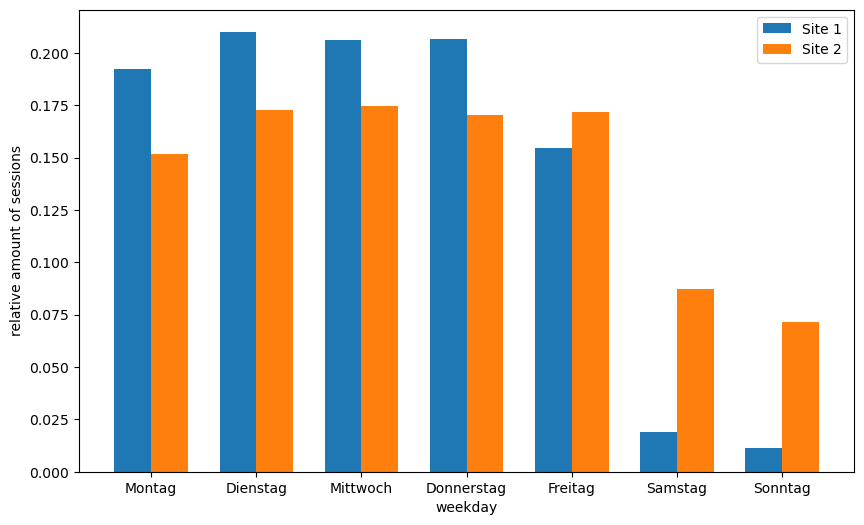

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

site_ids = sessions_by_weekday['siteID'].unique()
bar_width = 0.35  # Breite der Balken

for i, site_id in enumerate(site_ids):
    data = sessions_by_weekday[sessions_by_weekday['siteID'] == site_id]
    x_positions = np.arange(len(data)) + i * bar_width
    ax.bar(x_positions, data['relative_session_count'], label=f'Site {site_id}', width=bar_width)

# replace x-axis labeling by the weekday name
ax.set_xticks(np.arange(len(data)) + (len(site_ids) - 1) * bar_width / 2)
ax.set_xticklabels([weekday_mapping.get(w, str(w)) for w in data['weekday']])

ax.set_xlabel('weekday')
ax.set_ylabel('relative amount of sessions')
ax.legend()

plt.show()

As we can see the weekend differs notably between the two sites. At first instict we could make the assumption that the private site, which is only open to the employees of a company, should have significantly less traffic on weekends (since there is no business hours there), than the public university site where students and staff might still use the parking spots on the weekend. An exemplary use cases might be learning at the university's library on the weekend like many students do. Also, since it represents a public site, people not associated with the university might be using the parking spaces as well.

Based on these findings we shall make the initial thesis that site 1 represents the private site and site 2 represents the public one.

Next, we shall compare the average time a customer uses the parking space between the two sites. Since a typical work day consists of around 8 hours, we might see a pattern in the data in contrast to the public space where parking times might fluctuate more.

In [79]:
# group by "siteID" and calculate how long an average chargins session takes in hours
average_session_duration = charging_sessions_modified.groupby('siteID')['timeConnected'].mean()/60/60

print(average_session_duration)

siteID
1    6.856296
2    5.653222
Name: timeConnected, dtype: float64


As we can see, the average session at site 1 is around 7 hours long, which fits the assumption of being work place, considering there are also people in the work force that do not work a full 8 hour day, i.e. part-time workers. Site 1 also shows an average of around 1:12h more parking time than site 2, which could be argued to fit the more irregular and possibly short-timed nature of parking sessions at a public site.

In [85]:
# Group by 'siteID' and calculate the median, minimum, and maximum session duration in hours
session_duration_stats = charging_sessions_modified.groupby('siteID')['timeConnected'].agg(
    median='median', min='min', max='max') / 3600  

In [86]:
print(session_duration_stats)

          median       min         max
siteID                                
1       7.576111  0.050833   81.076944
2       4.734167  0.034444  245.269167


Note that the median of charging sessions for site 1 (private) fits the typical duration of a work day.
[sind die maximalen Werte zu erklären, oder handelt es sich um unlogische Ausreißer im Datensatz?]

Next, we compare the total amount of distinct users between the two sites. Maybe the public site amounts for a larger user base.

In [88]:
# Group by 'siteID' and count the number of unique users
unique_users_per_site = charging_sessions_modified.groupby('siteID')['userID'].nunique()

# Output the results
print(unique_users_per_site)

siteID
1    522
2    571
Name: userID, dtype: int64


The total mount of distint users between the two sites does not differ significantly, thus we cannot conclude any findings from this.

TODO: Untersuche: sind bei einer site mehr registrierte user als bei der anderen

In [94]:
# Extract month separately
charging_sessions_modified['month'] = charging_sessions_modified['connectionTime'].dt.month

# Group by 'siteID' and 'month' to calculate the number of sessions per site per month
sessions_per_month = charging_sessions_modified.groupby(['siteID', 'month']).size().reset_index(name='session_count')

# Output the results
print(sessions_per_month)

    siteID  month  session_count
0        1      1           3342
1        1      2           3258
2        1      3           2901
3        1      4           2390
4        1      5           2560
5        1      6           2560
6        1      7           2561
7        1      8           2568
8        1      9           2686
9        1     10           3227
10       1     11           2775
11       1     12           2801
12       2      1           1976
13       2      2           1964
14       2      3           1594
15       2      4           1615
16       2      5           3099
17       2      6           3216
18       2      7           3371
19       2      8           3901
20       2      9           3439
21       2     10           3338
22       2     11           2176
23       2     12           1719


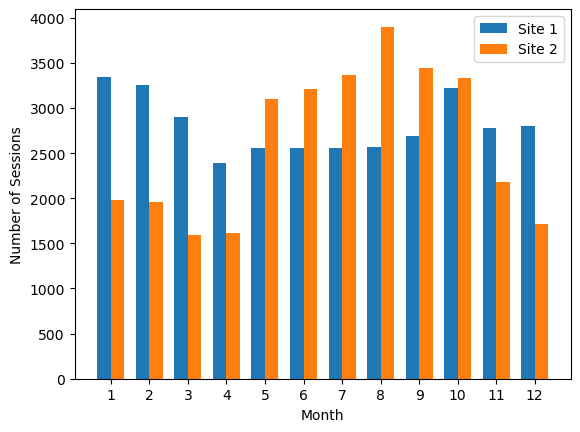

In [95]:
# Plot the sessions per month for each site
fig, ax = plt.subplots()
site_ids = sessions_per_month['siteID'].unique()

bar_width = 0.35
for i, site_id in enumerate(site_ids):
    data = sessions_per_month[sessions_per_month['siteID'] == site_id]
    ax.bar(data['month'] + i * bar_width, data['session_count'], label=f'Site {site_id}', width=bar_width)

# Add labels and legend
ax.set_xlabel('Month')
ax.set_ylabel('Number of Sessions')
ax.set_xticks(sessions_per_month['month'].unique() + (len(site_ids) - 1) * bar_width / 2)
ax.set_xticklabels(sessions_per_month['month'].unique())
ax.legend()

# Show the plot
plt.show()

Note that the number of charging sessions fluctuates more at the second (assumed public) site 
[weit hergeholt, aber: Studenten haben vielleicht im Sommer mehr Lust zur Uni zu fahren, wenn das Wetter schön ist? Während das Fahren zur Arbeit ein Muss ist und nicht vom Wetter abhängt]

mögliche Erklärung: Corona im Sommer mit geringerer Inzidenz